# Sklearn
## Метрики качества

Метрики качества могут использоваться:
- Для задания функционала ошибки (используется при обучении).
- Для подбора гиперпараметров (используется при измерении качества на кросс-валидации). В том числе
можно использовать другую метрику, которая отличается от метрики, с помощью которой построен
функционал ошибки.
- Для оценивания итоговой модели: пригодна ли модель для решения задачи.

Рассмотрим метрики качества для задачи классификации и для задачи регрессии.

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import cross_val_score, train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

### Генерация датасетов

#### Классификация

Сгенерируем данные для задачи классификации, используя `make_classification`. Зададим число признаков `n_features`, число информативных признаков `n_informative`, количество классов `n_classes`, количество избыточных признаков `n_redundant`.

In [2]:
clf_data, clf_target = datasets.make_classification(n_features=2, 
                                                    n_informative=2, 
                                                    n_classes=2, 
                                                    n_redundant=0,
                                                    n_clusters_per_class=1, 
                                                    random_state=7)

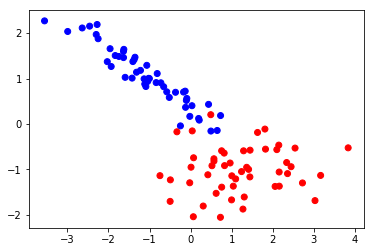

In [3]:
colors = ListedColormap(['red', 'blue'])
plt.scatter(clf_data[:,0], clf_data[:,1], c=clf_target, cmap=colors);

Разделим данные на обучение и контроль

In [4]:
clf_train_data,   clf_test_data, \
clf_train_labels, clf_test_labels = train_test_split(clf_data, clf_target, 
                                                     test_size=0.3, random_state=1)

#### Регрессия

Сгенерируем данные для задачи регрессии с помощью метода `make_regression`. Определим количество признаков `n_features`, количество информативных признаков `n_informative` (то, что действительно используется при получении target'а) и зададим стандартное отклонение нормального шума `noise`. 

In [5]:
reg_data, reg_target = datasets.make_regression(n_features=2, 
                                                n_informative=1, 
                                                noise=5., 
                                                random_state=7)

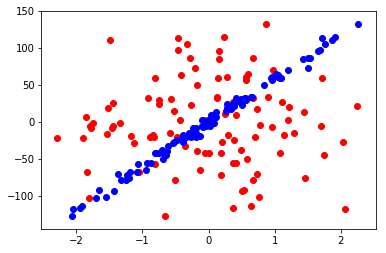

In [6]:
plt.scatter(reg_data[:, 0], reg_target, color = 'r')
plt.scatter(reg_data[:, 1], reg_target, color = 'b')

In [7]:
reg_train_data, reg_test_data, \
reg_train_labels, reg_test_labels = train_test_split(reg_data, reg_target,
                                                               test_size=0.3,
                                                               random_state=1)

# Метрики качества в задачах классификации

Обучим линейный классификатор `SGDClassifier` с логистической функией потерь `loss`='log'.

In [8]:
# создание модели
classifier = linear_model.SGDClassifier(loss='log', random_state=1, max_iter=1000)

In [9]:
# обучение
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [10]:
# предсказание метки класса
predictions = classifier.predict(clf_test_data)

In [11]:
# предсказание вероятности принадлежности к классу
probability_predictions = classifier.predict_proba(clf_test_data)

Оценка качества классификации

In [12]:
print(clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [13]:
print(predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [14]:
print(probability_predictions[:5])

[[1.47830304e-09 9.99999999e-01]
 [9.94270335e-01 5.72966493e-03]
 [9.84932678e-01 1.50673216e-02]
 [2.74687769e-08 9.99999973e-01]
 [9.99973086e-01 2.69143104e-05]]


## Доля правильных ответов  (accuracy* )
*не стоит переводить accuracy как точность, точность это другая метрика

Давайте посчитам долю правильных ответов.   
Определим метрику `accuracy` сами:

In [15]:
accuracy = sum([1. if pair[0] == pair[1] else 0. \
     for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)
print("{:.3f}". format(accuracy))

0.967


Или воспользуемся уже готовой реализацией расчета accuracy. Метод `accuracy_score` принимает два аргумента: истинные метки и предсказанные (accuracy_score(y_true, y_pred)).

In [16]:
print("{:.3f}". format(metrics.accuracy_score(clf_test_labels, predictions)))

0.967


Минусы использования accuracy:
    - плохо отражает качество модели, если выборка несбалансирована
    - не учитывает цену разных ошибок
Так, в задаче банковского скоринга необходимо принять решение, что хуже: выдать кредит «плохому» клиенту или не выдать кредит «хорошему» клиенту. Доля верных ответов не способна учитывать цены разных ошибок и поэтому не может дать ответа на этот вопрос.

## Матрица ошибок (confusion matrix)

Удобно классифицировать различные случаи, как соотносятся между собой результат работы алгоритма $a(x)$ и истинный ответ $y$, с помощью так называемой матрицы ошибок.

|         | y=1                 | y=-1                |
|---------|---------------------|---------------------|
| a(x)=1  | True Positive (TP)  | False Positive (FP) |
| a(x)=-1 | False Negative (FN) | True Negative (TN)  |

In [17]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[17  1]
 [ 0 12]]


Количество верных срабатываний алгоритма

In [18]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

29

Фактически число верных срабатываний это диагональных элементы confusion_matrix.

In [19]:
matrix.diagonal().sum()

29

## Точность (precision)

Точность (precision) показывает долю верных срабатываний среди всех срабатываний алгоритма.То есть precision, показывает, насколько можно доверять классификатору в случае срабатывания

$$precision = \frac{TP}{TP + FP}$$

Точность для 0-ого класса

In [20]:
print("{}".format(metrics.precision_score(clf_test_labels, predictions, pos_label=0)))

1.0


Точность

In [21]:
print("{:.3f}".format(metrics.precision_score(clf_test_labels, predictions)))

0.923


## Полнота (recall)

Полнота (recall) оказывает, на какой доле истинных объектов первого класса алгоритм
срабатывает.

$$recall = \frac{TP}{TP + FN}$$

In [22]:
metrics.recall_score(clf_test_labels, predictions, pos_label=0)

0.9444444444444444

In [23]:
metrics.recall_score(clf_test_labels, predictions)

1.0

## F1-мера

В некоторых задачах хочется максимизировать и точность, и полноту одновременно. Для этого используется F1-мера.

F1-мера - это среднее гармоническое precision и recall:
    $$F1 = \frac{2 \cdot precision \cdot recall}{precision + recall}$$

In [24]:
metrics.f1_score(clf_test_labels, predictions, pos_label=0)

0.9714285714285714

In [25]:
metrics.f1_score(clf_test_labels, predictions)

0.9600000000000001

## Отчет classification report

В `sklearn.metrix` есть возможность получить отчет по основным метрикам классификации с помщью метода `classification_report`.

In [26]:
target_names = ['class 0', 'class 1']
print(metrics.classification_report(clf_test_labels, predictions, 
                                    target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      0.94      0.97        18
    class 1       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        30



## Качество оценок принадлежности классу
## ROC-кривая 

Многие алгоритмы бинарной классификации устроены следующим образом: сначала вычисляется некоторое вещественное число $b(x)$ (оценка принадлежности к классу), которое сравнивается с порогом $t$.
$$a(x) = [b(x) > t]$$

Часто бывает необходимо оценить качество именно оценки принадлежности, а порог выбирается позже из соображений на точность или полноту.

ROC-кривая, которая строится в осях False Positive Rate (ось X) и True Positive Rate (ось Y).
$$False \ Positive \ Rate = \frac{FP}{FP+TN}$$
$$True \ Positive \ Rate = \frac{TP}{FP+FN}$$

Постепенно рассматриваются случаи различных значений порогов $t$ и отмечаются точки на графике.

In [27]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

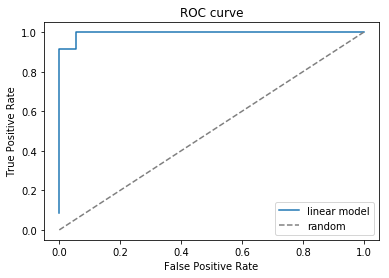

In [28]:
plt.plot(fpr, tpr, label='linear model')
plt.plot([0, 1], [0, 1], '--', color='grey', label='random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right");

Кривая стартует с точки (0, 0) и приходит в точку (1, 1). При этом, если существует идеальный классификатор, кривая должна пройти через точку (0, 1). Чем ближе кривая к этой точке, тем лучше будут оценки.

## Площадь по ROC кривой (ROC-AUC)

Площадь под ROC-кривой будет характеризовать качество оценок принадлежности к первому классу. Такая метрика называется площадь под ROC-кривой.

In [29]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9722222222222222

In [30]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9953703703703703

## Площадь под PR-кривой

Кривая точности и полноты.
По оси X откладывается полнота, а по оси Y — точность. Каждой точке на этой кривой будет соответствовать классификатор с некоторым значением порога.

In [31]:
metrics.average_precision_score(clf_test_labels, predictions)

0.9230769230769231

## Логистическая функция потерь  (log_loss)

In [32]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.0799522288701126

# Метрики качества в задачах регрессии

In [33]:
# создание модели
regressor = linear_model.SGDRegressor(random_state=1, max_iter=1000)

In [34]:
# обучение
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=1, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [35]:
# предсказание
reg_predictions = regressor.predict(reg_test_data)

In [36]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [37]:
print(reg_predictions)

[ -1.10119421   6.86045409 -51.88555031   5.60757752 -24.11326094
  -8.21008793  64.297975   -22.01087963  32.15166417 -40.45815864
 -17.5707969   32.59146042  28.64701473  -6.22449571  -2.84290772
 -82.01494994  88.77180377  16.20071479  24.49177496 -93.11207831
  15.73249033  33.54049251 100.27931346  23.15337577 -44.74725063
 -98.71457686  90.51277709   1.00999195 -16.51385107 -23.76030913]


## Средняя квадратичная ошибка (mean squared error)

$$MSE(a, X) = \frac{1}{l}\sum_{i=1}^l(y_i - a(x_i))^2$$

In [38]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

23.533664040325984

## Средняя абсолютная ошибка (mean absolute error)

У такого функционала больше устойчивость к выбросам, так как штраф за сильное отклонение гораздо меньше.

$$MAE(a, X) = \frac{1}{l}\sum_{i=1}^l|y_i - a(x_i)|$$

In [39]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.7262703265564743

## Корень из средней квадратичной ошибки (root mean squared error)

In [40]:
from numpy import sqrt

In [41]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.851150795463483

## Коэффициент детерминации $R^2$ (r2 score)

Этот коэффициент показывает, какую долю дисперсии (разнообразия ответов) во всем целевом векторе y модель смогла объяснить.

$$R^2(a, X) = 1 - \frac{\sum_{i=1}^l(y_i - a(x_i))^2}{\sum_{i=1}^l(y_i - \overline y)}$$

In [42]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.9895751012195239

- $R^2 = 1$ соответствует случаю идеальной модели
- $R^2 = 0$ — модели на уровне оптимальной «константной»
- $R^2 < 0$ — модели хуже «константной» (такие алгоритмы никогда не нужно рассматривать)